In [4]:
# This code is exactly like the previous one, but includes the changes necessary to run the code on the GPU
# Only 2 things need to be in the GPU, your models and your variables.


###################################################################
#  Import Libraries
###################################################################
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.autograd import Variable


###################################################################
#  Get and Organize the data
###################################################################
# We are trying a linear model here. So data should be a column
# x_train should have as many rows as y_correct
# x_train can have multiple colunmns. but in this case the model must
# have input_dim equal to the number of columns

# Define Data 1 
# This is data entered manually to shape scalars as a numpy array column
x_train = np.asarray([[1],[2],[1],[1],[4],[3]],dtype = np.uint8)
y_correct =  np.asarray([[3],[6],[6],[4],[12],[9]],dtype = np.uint8)

# Define Data 2
# alternatively, you can make the process more automatic
domain_size = 18
x_train = np.arange(domain_size,dtype=np.float64)
x_train = np.reshape(x_train, (domain_size,1))
error =  (np.random.rand(x_train.shape[0],x_train.shape[1])-0.5) *2
bias = 10
y_correct = x_train * 5  + error + bias


###################################################################
# 1- Define the model
###################################################################
class MyLinearRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        """
        nn.Module is just an other name for network or module
        in __init__() you define the layers of the network
        you should specify them with the number of inputs and outputs
        nn.Linear for linear layers
        """
        super().__init__() # Calling Super Class's constructor
        self.linear = nn.Linear(input_dim, output_dim)
        # nn.linear is defined in nn.Module

    def forward(self, x):
        # Here the forward pass is simply a linear function
        out = self.linear(x)
        return out


###################################################################
#  TRAINING
###################################################################
# 2- Instantiate the model class
input_dim = 1
output_dim = 1
model = MyLinearRegressionModel(input_dim,output_dim)

# This code sends your model to run on the GPU
if torch.cuda.is_available():
    model.cuda()

# 3- Instantiate the Loss class 
criterion = nn.MSELoss()# Establish loss function: Mean Squared Loss

# 4- Instantiate the Optimizer class
l_rate = 0.01 # learning rate
optimiser = torch.optim.SGD(model.parameters(), lr = l_rate) # Optimization rule: Stochastic Gradient Descent


# 5- Train the Model 
epochs = 2000
for epoch in range(epochs):
    epoch +=1 #increase the number of epochs by 1 every time
    
    #Convert numpy arrays to torch variables
    if torch.cuda.is_available(): # TO RUN IN GPU
        inputs = Variable(torch.from_numpy(x_train).cuda())
        labels = Variable(torch.from_numpy(y_correct).cuda())
    else:
        inputs = Variable(torch.from_numpy(x_train))
        labels = Variable(torch.from_numpy(y_correct))

    # Clears grads from previous epochs. Otherwise they will be accumulated
    optimiser.zero_grad()

    # Runs forward to get predicted values
    outputs = model.forward(inputs.float())
    
    # This calculates the loss (or error)
    loss = criterion(outputs, labels.float()) 
    
    # This getts the gradients with respect to the parameters
    loss.backward()
    
    # This updates the parameters
    optimiser.step()
    
    print('epoch {}, loss {}'.format(epoch,loss.data))

epoch 1, loss 3201.9794921875
epoch 2, loss 3188.662109375
epoch 3, loss 3175.400634765625
epoch 4, loss 3162.195556640625
epoch 5, loss 3149.046142578125
epoch 6, loss 3135.95361328125
epoch 7, loss 3122.916259765625
epoch 8, loss 3109.93408203125
epoch 9, loss 3097.006591796875
epoch 10, loss 3084.13427734375
epoch 11, loss 3071.315673828125
epoch 12, loss 3058.552490234375
epoch 13, loss 3045.842529296875
epoch 14, loss 3033.185302734375
epoch 15, loss 3020.583740234375
epoch 16, loss 3008.03466796875
epoch 17, loss 2995.539306640625
epoch 18, loss 2983.095458984375
epoch 19, loss 2970.704833984375
epoch 20, loss 2958.36572265625
epoch 21, loss 2946.080322265625
epoch 22, loss 2933.84765625
epoch 23, loss 2921.666748046875
epoch 24, loss 2909.53515625
epoch 25, loss 2897.455810546875
epoch 26, loss 2885.42724609375
epoch 27, loss 2873.449462890625
epoch 28, loss 2861.522216796875
epoch 29, loss 2849.6455078125
epoch 30, loss 2837.8203125
epoch 31, loss 2826.044677734375
epoch 32, lo

epoch 293, loss 956.4932861328125
epoch 294, loss 952.5594482421875
epoch 295, loss 948.6419067382812
epoch 296, loss 944.740478515625
epoch 297, loss 940.854736328125
epoch 298, loss 936.9852294921875
epoch 299, loss 933.1318359375
epoch 300, loss 929.2940673828125
epoch 301, loss 925.472412109375
epoch 302, loss 921.666259765625
epoch 303, loss 917.8760986328125
epoch 304, loss 914.1018676757812
epoch 305, loss 910.3428955078125
epoch 306, loss 906.5989379882812
epoch 307, loss 902.8705444335938
epoch 308, loss 899.1580810546875
epoch 309, loss 895.460693359375
epoch 310, loss 891.7786254882812
epoch 311, loss 888.1118774414062
epoch 312, loss 884.4600830078125
epoch 313, loss 880.823486328125
epoch 314, loss 877.201416015625
epoch 315, loss 873.5945434570312
epoch 316, loss 870.0022583007812
epoch 317, loss 866.4249267578125
epoch 318, loss 862.8626098632812
epoch 319, loss 859.3147583007812
epoch 320, loss 855.781494140625
epoch 321, loss 852.2630615234375
epoch 322, loss 848.75939

epoch 595, loss 275.9949645996094
epoch 596, loss 274.8626403808594
epoch 597, loss 273.7350158691406
epoch 598, loss 272.6119384765625
epoch 599, loss 271.49359130859375
epoch 600, loss 270.3798828125
epoch 601, loss 269.2706604003906
epoch 602, loss 268.16595458984375
epoch 603, loss 267.06591796875
epoch 604, loss 265.9703674316406
epoch 605, loss 264.8792419433594
epoch 606, loss 263.7926025390625
epoch 607, loss 262.71044921875
epoch 608, loss 261.6329345703125
epoch 609, loss 260.55975341796875
epoch 610, loss 259.4908447265625
epoch 611, loss 258.42633056640625
epoch 612, loss 257.36627197265625
epoch 613, loss 256.310546875
epoch 614, loss 255.2592010498047
epoch 615, loss 254.21212768554688
epoch 616, loss 253.1692657470703
epoch 617, loss 252.13082885742188
epoch 618, loss 251.0965118408203
epoch 619, loss 250.06661987304688
epoch 620, loss 249.04090881347656
epoch 621, loss 248.0193634033203
epoch 622, loss 247.001953125
epoch 623, loss 245.9886932373047
epoch 624, loss 244.

epoch 879, loss 86.00341796875
epoch 880, loss 85.65167999267578
epoch 881, loss 85.30139923095703
epoch 882, loss 84.95254516601562
epoch 883, loss 84.60513305664062
epoch 884, loss 84.25911712646484
epoch 885, loss 83.91453552246094
epoch 886, loss 83.57135772705078
epoch 887, loss 83.22962188720703
epoch 888, loss 82.88932037353516
epoch 889, loss 82.55036163330078
epoch 890, loss 82.21280670166016
epoch 891, loss 81.87661743164062
epoch 892, loss 81.54178619384766
epoch 893, loss 81.20832061767578
epoch 894, loss 80.87628936767578
epoch 895, loss 80.54560852050781
epoch 896, loss 80.21622467041016
epoch 897, loss 79.88829040527344
epoch 898, loss 79.56171417236328
epoch 899, loss 79.23641967773438
epoch 900, loss 78.91249084472656
epoch 901, loss 78.58990478515625
epoch 902, loss 78.26866912841797
epoch 903, loss 77.94873809814453
epoch 904, loss 77.63003540039062
epoch 905, loss 77.31265258789062
epoch 906, loss 76.99659729003906
epoch 907, loss 76.68192291259766
epoch 908, loss 7

epoch 1162, loss 27.084218978881836
epoch 1163, loss 26.974491119384766
epoch 1164, loss 26.865196228027344
epoch 1165, loss 26.75634002685547
epoch 1166, loss 26.647945404052734
epoch 1167, loss 26.53998374938965
epoch 1168, loss 26.43245506286621
epoch 1169, loss 26.325361251831055
epoch 1170, loss 26.21874237060547
epoch 1171, loss 26.11252212524414
epoch 1172, loss 26.006771087646484
epoch 1173, loss 25.901451110839844
epoch 1174, loss 25.79656219482422
epoch 1175, loss 25.692081451416016
epoch 1176, loss 25.588035583496094
epoch 1177, loss 25.48440933227539
epoch 1178, loss 25.38125228881836
epoch 1179, loss 25.278512954711914
epoch 1180, loss 25.176204681396484
epoch 1181, loss 25.074289321899414
epoch 1182, loss 24.972816467285156
epoch 1183, loss 24.87177085876465
epoch 1184, loss 24.771102905273438
epoch 1185, loss 24.670848846435547
epoch 1186, loss 24.571033477783203
epoch 1187, loss 24.471607208251953
epoch 1188, loss 24.37256622314453
epoch 1189, loss 24.27393341064453
epo

epoch 1451, loss 8.496146202087402
epoch 1452, loss 8.46273422241211
epoch 1453, loss 8.429447174072266
epoch 1454, loss 8.396302223205566
epoch 1455, loss 8.363298416137695
epoch 1456, loss 8.330434799194336
epoch 1457, loss 8.297718048095703
epoch 1458, loss 8.265110969543457
epoch 1459, loss 8.232651710510254
epoch 1460, loss 8.200321197509766
epoch 1461, loss 8.168119430541992
epoch 1462, loss 8.136064529418945
epoch 1463, loss 8.104146957397461
epoch 1464, loss 8.07236099243164
epoch 1465, loss 8.040680885314941
epoch 1466, loss 8.009126663208008
epoch 1467, loss 7.977717876434326
epoch 1468, loss 7.946443557739258
epoch 1469, loss 7.91529655456543
epoch 1470, loss 7.884276390075684
epoch 1471, loss 7.853381633758545
epoch 1472, loss 7.822626113891602
epoch 1473, loss 7.791981220245361
epoch 1474, loss 7.761453628540039
epoch 1475, loss 7.731067180633545
epoch 1476, loss 7.700798988342285
epoch 1477, loss 7.670658588409424
epoch 1478, loss 7.64064884185791
epoch 1479, loss 7.61073

epoch 1729, loss 2.952390670776367
epoch 1730, loss 2.9417431354522705
epoch 1731, loss 2.931140899658203
epoch 1732, loss 2.920591354370117
epoch 1733, loss 2.9100840091705322
epoch 1734, loss 2.8996152877807617
epoch 1735, loss 2.889193058013916
epoch 1736, loss 2.878817319869995
epoch 1737, loss 2.8684778213500977
epoch 1738, loss 2.858180046081543
epoch 1739, loss 2.847923755645752
epoch 1740, loss 2.8377161026000977
epoch 1741, loss 2.827544689178467
epoch 1742, loss 2.817413806915283
epoch 1743, loss 2.8073253631591797
epoch 1744, loss 2.7972793579101562
epoch 1745, loss 2.7872767448425293
epoch 1746, loss 2.7773091793060303
epoch 1747, loss 2.7673873901367188
epoch 1748, loss 2.7575013637542725
epoch 1749, loss 2.74765682220459
epoch 1750, loss 2.737852096557617
epoch 1751, loss 2.728090524673462
epoch 1752, loss 2.7183728218078613
epoch 1753, loss 2.7086942195892334
epoch 1754, loss 2.6990604400634766
epoch 1755, loss 2.689467191696167
epoch 1756, loss 2.6799023151397705
epoch 

In [5]:
###################################################################
# Show real data on top of the prediction
###################################################################
predicted = model.forward(Variable(torch.from_numpy(x_train)).float()).data.numpy()
plt.plot(x_train, y_correct, 'go', label = 'from data', alpha = 0.25)
plt.plot(x_train, predicted, label = 'prediction', alpha = 0.75)
plt.legend()
plt.show()
print(predicted)

RuntimeError: Expected object of backend CUDA but got backend CPU for argument #4 'mat1'

In [59]:
###################################################################
# How to save a trained model
###################################################################
save_model = False
if save_model is True:
    # Saves only parameters
    # alpha & beta
    torch.save(model.state_dict(), 'awesome_linear_model.pkl')
    
# Shows the content of what will be saved
print(model.state_dict())

OrderedDict([('linear.weight', tensor([[5.0022]])), ('linear.bias', tensor([0.9746]))])


In [18]:
###################################################################
# How to load a trained model
###################################################################
load_model = True
if load_model is True:
    model.load_state_dict(torch.load('awesome_linear_model.pkl'))

MyLinearRegressionModel(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)


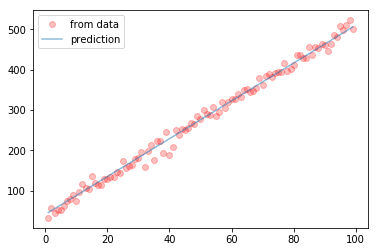

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]
 [12]
 [13]
 [14]
 [15]
 [16]
 [17]
 [18]
 [19]
 [20]
 [21]
 [22]
 [23]
 [24]
 [25]
 [26]
 [27]
 [28]
 [29]
 [30]
 [31]
 [32]
 [33]
 [34]
 [35]
 [36]
 [37]
 [38]
 [39]
 [40]
 [41]
 [42]
 [43]
 [44]
 [45]
 [46]
 [47]
 [48]
 [49]
 [50]
 [51]
 [52]
 [53]
 [54]
 [55]
 [56]
 [57]
 [58]
 [59]
 [60]
 [61]
 [62]
 [63]
 [64]
 [65]
 [66]
 [67]
 [68]
 [69]
 [70]
 [71]
 [72]
 [73]
 [74]
 [75]
 [76]
 [77]
 [78]
 [79]
 [80]
 [81]
 [82]
 [83]
 [84]
 [85]
 [86]
 [87]
 [88]
 [89]
 [90]
 [91]
 [92]
 [93]
 [94]
 [95]
 [96]
 [97]
 [98]
 [99]] [[ 32.87444537]
 [ 56.65619381]
 [ 45.1761277 ]
 [ 51.60662221]
 [ 53.27109126]
 [ 61.97156352]
 [ 74.29956315]
 [ 79.15311136]
 [ 90.31687479]
 [ 75.59716878]
 [ 96.12692407]
 [116.24652448]
 [107.63529304]
 [105.2607028 ]
 [137.70959195]
 [119.29299919]
 [113.85796882]
 [114.85557761]
 [129.44868392]
 [128.80124315]
 [132.94086512]
 [134.94147609]
 [147.35700861]
 [144.29337895]
 [172.64184253]
 [157

In [45]:
###################################################################
# How to use the model on new data
###################################################################
print(model.eval()) # Shows the model and describes its parameters

#Load data to be predicted
x = np.reshape(np.arange(1,100),(np.arange(1,100).shape[0],1))
data = Variable(torch.from_numpy(x)).float()

# Calculate the prediction
#output = model.forward(data)
#prediction = torch.argmax(output)
#predicted = prediction.data.numpy()

# Calculate the prediction
predicted = model.forward(Variable(torch.from_numpy(x)).float()).data.numpy()


# "real data"
y = x*4.68 +41 + np.random.randn(np.arange(1,100).shape[0],1)*12

# Visualize the data
plt.plot(x, y, 'go', label = 'from data', alpha = 0.25, color='r')
plt.plot(x, predicted, label = 'prediction', alpha = 0.5)
plt.legend()
plt.show()
print(x,y)

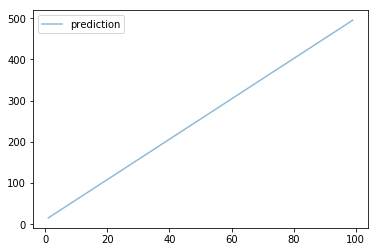

tensor([[ 46.2167],
        [ 50.9013],
        [ 55.5860],
        [ 60.2706],
        [ 64.9553],
        [ 69.6399],
        [ 74.3246],
        [ 79.0092],
        [ 83.6939],
        [ 88.3785],
        [ 93.0632],
        [ 97.7478],
        [102.4325],
        [107.1171],
        [111.8018],
        [116.4864],
        [121.1711],
        [125.8557],
        [130.5404],
        [135.2250],
        [139.9097],
        [144.5943],
        [149.2790],
        [153.9637],
        [158.6483],
        [163.3329],
        [168.0176],
        [172.7022],
        [177.3869],
        [182.0715],
        [186.7562],
        [191.4409],
        [196.1255],
        [200.8102],
        [205.4948],
        [210.1794],
        [214.8641],
        [219.5488],
        [224.2334],
        [228.9181],
        [233.6027],
        [238.2874],
        [242.9720],
        [247.6566],
        [252.3413],
        [257.0260],
        [261.7106],
        [266.3953],
        [271.0799],
        [275.7646],


In [66]:
predicted = model.forward(Variable(torch.from_numpy(x)).float()).data.numpy()
plt.plot(x, predicted, label = 'prediction', alpha = 0.5)
plt.legend()
plt.show()
print(output)

In [67]:
predicted = model.forward(Variable(torch.from_numpy(x)).float()).data.numpy()
?torch.argmax

In [68]:
print(np.reshape(np.arange(1,100),(len(np.arange(1,100))-1,1)))

ValueError: cannot reshape array of size 99 into shape (98,1)

In [2]:

import torch
torch.cuda.is_available()

True

In [1]:
prediction

NameError: name 'prediction' is not defined